In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [84]:
#load prices
df = pd.read_csv("../data/merged.csv", index_col=0, parse_dates=True)

# Make sure all columns are numeric
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors="coerce")

#drop NaN rows
df = df.dropna()

print("Loaded and cleaned prices:")
print(df.head())

Loaded and cleaned prices:
               ES=F      NQ=F
Price                        
2021-01-04  3692.25  12685.50
2021-01-05  3718.25  12793.50
2021-01-06  3740.50  12616.75
2021-01-07  3795.50  12928.00
2021-01-08  3817.50  13097.25


/var/folders/jb/pk23bkyn13b2jj0ptqjmbskr0000gn/T/ipykernel_67519/695321782.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv("../data/merged.csv", index_col=0, parse_dates=True)


In [106]:
#load signals csv
signals = pd.read_csv("../outputs/signals.csv", index_col=0, parse_dates=True)
signals = signals.squeeze() #daraframe

#confirm allginment of signals w csv
signals = signals.reindex(df.index).ffill().fillna(0)

#PARAMETES HARDCODED
window = 60
beta = 0.2228

capital = 100000 #starting capital
position_size = 100 #contract size

In [107]:
#find spread

#find spread RETURNS
spread_returns = spread.diff().fillna(0)

print(spread_returns.head())


Price
2021-01-04     0.000000
2021-01-05    17.829770
2021-01-06    35.621186
2021-01-07    31.453852
2021-01-08     9.196191
dtype: float64


In [108]:
# Create position series: signals lagged by 1 day
positions = signals.shift(1).fillna(0)

#daily pnl
daily_pnl = positions * spread_returns * position_size

daily_pnl = positions * spread_returns * position_size
daily_pnl = daily_pnl.fillna(0)


#CUMULATIVE pnl
cumulative_pnl = daily_pnl.cumsum() + capital

print(cumulative_pnl.head(40))

Price
2021-01-04    100000.000000
2021-01-05    100000.000000
2021-01-06    100000.000000
2021-01-07    100000.000000
2021-01-08    100000.000000
2021-01-11    100000.000000
2021-01-12    100000.000000
2021-01-13    100000.000000
2021-01-14    100000.000000
2021-01-15    100000.000000
2021-01-19    100000.000000
2021-01-20    100000.000000
2021-01-21    100000.000000
2021-01-22    100000.000000
2021-01-25    100000.000000
2021-01-26    100000.000000
2021-01-27    100000.000000
2021-01-28    100000.000000
2021-01-29    100000.000000
2021-02-01    100000.000000
2021-02-02    100000.000000
2021-02-03    100000.000000
2021-02-04    100000.000000
2021-02-05    100000.000000
2021-02-08    100000.000000
2021-02-09    100000.000000
2021-02-10    100000.000000
2021-02-11    100000.000000
2021-02-12    100000.000000
2021-02-16    100000.000000
2021-02-17    100000.000000
2021-02-18    100000.000000
2021-02-19    100000.000000
2021-02-22    100000.000000
2021-02-23     99306.027865
2021-02-24    

In [109]:
print(daily_pnl.head(40))
print(daily_pnl.cumsum().head(10))


Price
2021-01-04       0.000000
2021-01-05       0.000000
2021-01-06       0.000000
2021-01-07       0.000000
2021-01-08       0.000000
2021-01-11      -0.000000
2021-01-12       0.000000
2021-01-13       0.000000
2021-01-14      -0.000000
2021-01-15      -0.000000
2021-01-19       0.000000
2021-01-20       0.000000
2021-01-21      -0.000000
2021-01-22      -0.000000
2021-01-25       0.000000
2021-01-26      -0.000000
2021-01-27      -0.000000
2021-01-28       0.000000
2021-01-29      -0.000000
2021-02-01       0.000000
2021-02-02       0.000000
2021-02-03       0.000000
2021-02-04       0.000000
2021-02-05       0.000000
2021-02-08       0.000000
2021-02-09      -0.000000
2021-02-10       0.000000
2021-02-11       0.000000
2021-02-12       0.000000
2021-02-16      -0.000000
2021-02-17       0.000000
2021-02-18      -0.000000
2021-02-19      -0.000000
2021-02-22      -0.000000
2021-02-23    -693.972135
2021-02-24   -3617.846980
2021-02-25    5892.545841
2021-02-26    2474.528425
2021-0

In [110]:
print("Unique signals values:", signals.unique())
print("Number of nonzero signals:", (signals != 0).sum())

print("Spread returns stats:")
print(spread_returns.describe())



Unique signals values: [ 0 -1  1]
Number of nonzero signals: 321
Spread returns stats:
count    1144.000000
mean       -1.201094
std        58.757821
min      -251.974557
25%       -28.895575
50%        -1.972534
75%        25.611679
max       545.569851
dtype: float64


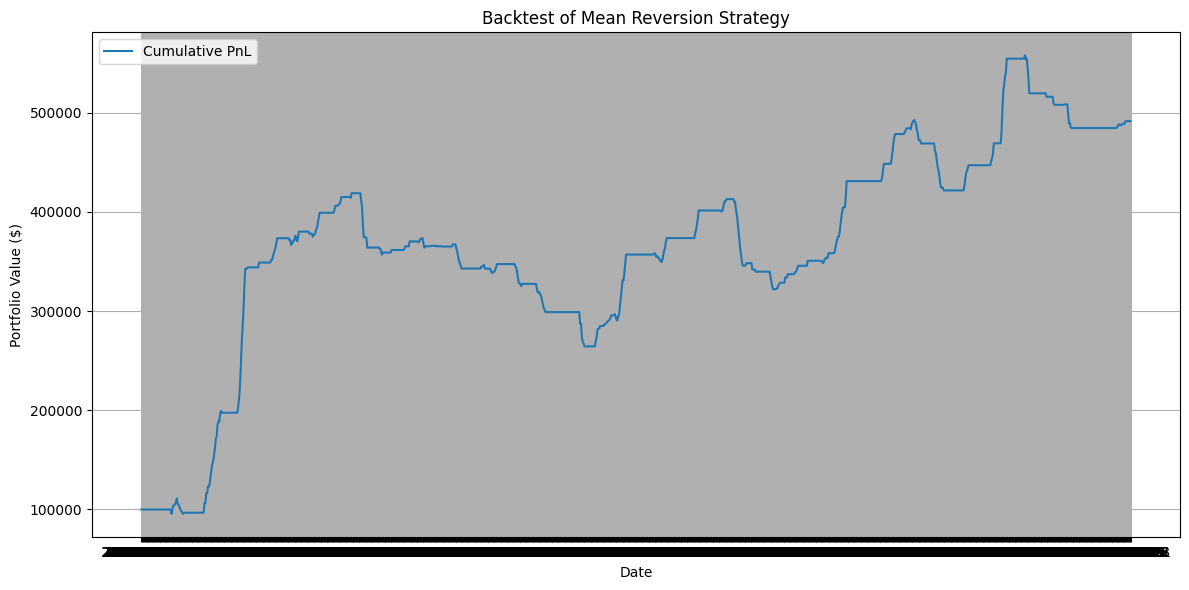

In [111]:
#plot cumulative pnl
plt.figure(figsize=(12,6))
plt.plot(cumulative_pnl, label="Cumulative PnL")
plt.title("Backtest of Mean Reversion Strategy")
plt.xlabel("Date")
plt.ylabel("Portfolio Value ($)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [112]:
total_return = cumulative_pnl.iloc[-1] - capital
annualized_return = total_return / (len(cumulative_pnl) / 252)
annualized_vol = daily_pnl.std() * np.sqrt(252)

print(f"Total return: ${total_return:,.2f}")
print(f"Annualized return: ${annualized_return:,.2f}")
print(f"Annualized volatility: ${annualized_vol:,.2f}")

Total return: $391,567.74
Annualized return: $86,254.43
Annualized volatility: $48,860.08
